In [1]:
!wget https://www.dropbox.com/s/yu591xskdlr04h4/image_data.zip?dl=0
!unzip /content/image_data.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: images/images/training_set/iconography/i (793).jpeg  
  inflating: images/images/training_set/iconography/i (794).jpeg  
  inflating: images/images/training_set/iconography/i (795).jpeg  
  inflating: images/images/training_set/iconography/i (796).jpeg  
  inflating: images/images/training_set/iconography/i (797).jpeg  
  inflating: images/images/training_set/iconography/i (798).jpeg  
  inflating: images/images/training_set/iconography/i (799).jpeg  
  inflating: images/images/training_set/iconography/i (8).jpeg  
  inflating: images/images/training_set/iconography/i (8).jpg  
  inflating: images/images/training_set/iconography/i (8).png  
  inflating: images/images/training_set/iconography/i (80).jpeg  
  inflating: images/images/training_set/iconography/i (80).jpg  
  inflating: images/images/training_set/iconography/i (800).jpeg  
  inflating: images/images/training_set/iconography/i (801).jpeg  
  inflating: images/im

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab,lab2rgb
from skimage.io import imread,imshow
import shutil
import os 

In [3]:
TRAIN_ROOT_DIR="/content/images/images/training_set" 
DEST="/content/train/images"

if not os.path.exists(DEST):
    os.makedirs(DEST)

    for dir in os.listdir(TRAIN_ROOT_DIR):
        for img in os.listdir(os.path.join(TRAIN_ROOT_DIR,dir)):
            ORG=os.path.join(TRAIN_ROOT_DIR,dir,img)
            try:
                imread(ORG)
                shutil.copy(ORG,DEST)
            except:
                print(f"the image at {ORG} cannot be used")

the image at /content/images/images/training_set/iconography/i (294).jpg cannot be used
the image at /content/images/images/training_set/iconography/i (64).jpg cannot be used
the image at /content/images/images/training_set/painting/p (518).jpg cannot be used
the image at /content/images/images/training_set/painting/p (449).jpg cannot be used
the image at /content/images/images/training_set/painting/p (1757).jpg cannot be used
the image at /content/images/images/training_set/painting/p (135).jpg cannot be used
the image at /content/images/images/training_set/painting/p (1018).jpg cannot be used
the image at /content/images/images/training_set/painting/p (660).jpg cannot be used
the image at /content/images/images/training_set/painting/p (1559).jpg cannot be used
the image at /content/images/images/training_set/painting/p (1308).jpg cannot be used
the image at /content/images/images/training_set/painting/p (206).jpg cannot be used
the image at /content/images/images/training_set/paintin

In [4]:
#New images are stored in train 
len(os.listdir('/content/train/images'))

7721

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(
                                 rescale=1/255,
                                 featurewise_center=True,
                                 rotation_range=40,
                                 horizontal_flip=True,
                                 vertical_flip=True
)

train=train_datagen.flow_from_directory(
                                        'train',
                                        target_size=(256,256),
                                        batch_size=1500,
                                        shuffle=True
)

Found 7721 images belonging to 1 classes.


In [7]:
#For images 
t_img , label=train.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [8]:
def plotImage(img_arr,label):
    """
    inp:img arr
    out:plot the img
    """
    plt.figure(figsize=(5,5))

    for im,l in zip(img_arr,label):

        plt.imshow(im)
        plt.title(im.shape)
        plt.axis('off')
        plt.show()

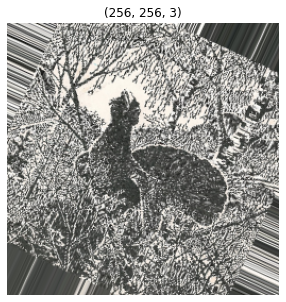

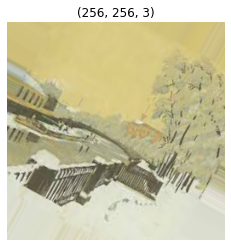

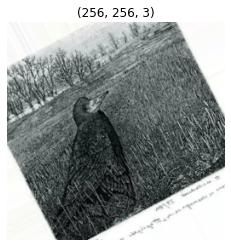

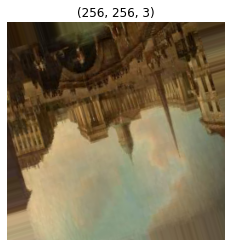

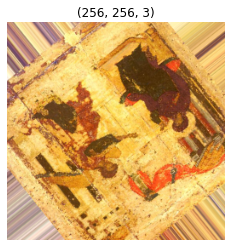

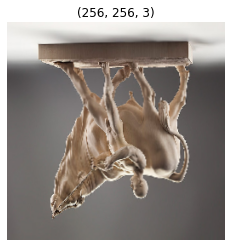

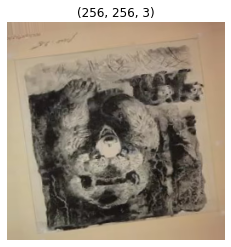

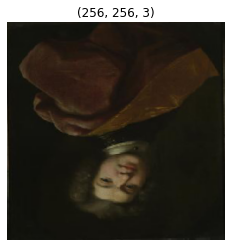

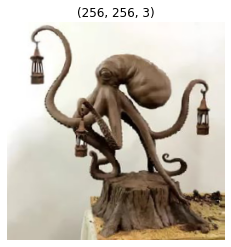

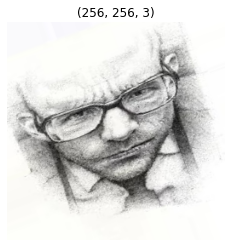

In [9]:
plotImage(t_img[:10],label[:10])

In [10]:
X=[]
y=[]

for img in t_img:
    try:
        lab=rgb2lab(img)
        X.append(lab[:,:,0])
        y.append(lab[:,:,1:]/128)
    except:
        print('Unable to convert to lab')


In [11]:
X_train=np.array(X)
X_train=np.expand_dims(X_train,axis=len(X_train.shape))

y_train=np.array(y)

In [12]:
X_train.shape, y_train.shape

((1500, 256, 256, 1), (1500, 256, 256, 2))

In [13]:
#Encoder Decoder model
from tensorflow.keras.layers import Conv2D,MaxPool2D,UpSampling2D,Input,LeakyReLU
from tensorflow.keras.models import Sequential 

In [14]:
model=Sequential()
#Encoder
model.add(Conv2D(64,(3,3),activation='relu',padding='same',strides=2,input_shape=(256,256,1)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',strides=2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',strides=2))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))

#Decoding

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))#Size gets doubled
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
model.add(Conv2D(2,(3,3),activation=LeakyReLU(alpha=0.01),padding='same'))
model.add(UpSampling2D((2,2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       295040    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 512)       590336    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 512)       2

In [15]:
model.compile(
              optimizer='adam',
              metrics=['acc'],
              loss='mse'
)

In [16]:
train=model.fit(X_train,y_train,epochs=30,batch_size=32,steps_per_epoch=X_train.shape[0]//32,verbose=1)

Epoch 1/30
46/46 [==============================] - 53s 281ms/step - loss: 0.7004 - acc: 0.7919
Epoch 2/30
46/46 [==============================] - 20s 284ms/step - loss: 0.0103 - acc: 0.7986
Epoch 3/30
46/46 [==============================] - 13s 287ms/step - loss: 0.0100 - acc: 0.8014
Epoch 4/30
46/46 [==============================] - 13s 292ms/step - loss: 0.0100 - acc: 0.7991
Epoch 5/30
46/46 [==============================] - 14s 299ms/step - loss: 0.0099 - acc: 0.7973
Epoch 6/30
46/46 [==============================] - 14s 297ms/step - loss: 0.0098 - acc: 0.8036
Epoch 7/30
46/46 [==============================] - 13s 293ms/step - loss: 0.0096 - acc: 0.8052
Epoch 8/30
46/46 [==============================] - 13s 291ms/step - loss: 0.0100 - acc: 0.7918
Epoch 9/30
46/46 [==============================] - 13s 289ms/step - loss: 0.0094 - acc: 0.8019
Epoch 10/30
46/46 [==============================] - 13s 290ms/step - loss: 0.0098 - acc: 0.7980
Epoch 11/30
46/46 [====================

In [17]:
model.save('./photomodel.h5')

In [18]:
from keras.preprocessing.image import img_to_array,load_img

In [19]:
def color_img(name):
  img1_color=[]
  path=name
  img=img_to_array(
      load_img(path,target_size=(256,256,3))
  )/255

  plt.title('Input image')
  imshow(img)
  plt.axis('off')
  plt.show()

  img1_color.append(img)
  img1_color=rgb2lab(img1_color)[:,:,:,0]
  img1_color=img1_color.reshape(img1_color.shape+(1,))

  ot=model.predict(img1_color)
  ot=ot*128

  result=np.zeros((256,256,3))
  result[:,:,0]=img1_color[0][:,:,0]
  result[:,:,1:]=ot[0]

  imshow(lab2rgb(result))


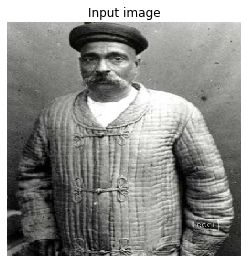

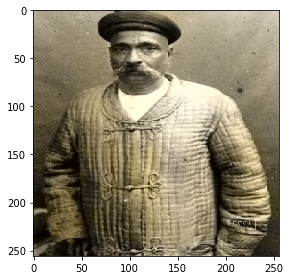

In [22]:
color_img('/content/ab989df7de9fcda4618053b95c5546f4.jpg')